In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# For random matrices to not change.
np.random.seed(99)
tf.set_random_seed(99)

In [3]:
rand_a = np.random.uniform(0, 100, (5,5))

In [4]:
rand_a

array([[67.22785586, 48.80783992, 82.5495174 ,  3.14463876, 80.80499634],
       [56.56174196, 29.76224987,  4.66957205, 99.06273995,  0.6825733 ],
       [76.97930282, 74.6767101 , 37.74389363, 49.41474522, 92.89483921],
       [39.54540443, 97.39562968, 52.44147154,  9.36130933, 81.33084128],
       [21.16867856, 55.43457846, 29.2269116 , 81.614236  , 82.80425662]])

In [5]:
rand_b = np.random.uniform(0, 100, (5,1))

In [6]:
rand_b

array([[22.15773717],
       [64.48347016],
       [ 9.51816219],
       [41.16632388],
       [ 9.68652613]])

In [7]:
a = tf.placeholder(tf.float32)

In [8]:
b = tf.placeholder(tf.float32)

In [9]:
add_op = a + b

In [10]:
mul_op = a * b

In [11]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict={a:10, b:20})
    print(add_result)
    print("\n")
    mul_result = sess.run(mul_op, feed_dict={a:10, b:20})
    print(mul_result)

30.0


200.0


In [12]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    print("\n")
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mul_result)

[[ 89.3856    70.965576 104.70725   25.302376 102.96273 ]
 [121.04521   94.24571   69.15304  163.5462    65.16604 ]
 [ 86.49747   84.19487   47.262054  58.932907 102.412994]
 [ 80.71173  138.56195   93.607796  50.527634 122.49716 ]
 [ 30.855206  65.1211    38.913437  91.30076   92.49078 ]]


[[1489.6173   1081.4713   1829.1105     69.67808  1790.4558  ]
 [3647.297    1919.173     301.1102   6387.9087     44.014694]
 [ 732.7014    710.78503   359.25247   470.33755   884.1881  ]
 [1627.9391   4009.4202   2158.8225    385.3707   3348.0918  ]
 [ 205.05096   536.9685    283.10724   790.5584    802.08563 ]]


In [13]:
# Neural Network

In [14]:
n_features = 10
n_dense_neurons = 3

In [15]:
# Inputs
x = tf.placeholder(tf.float32,(None, n_features))

In [16]:
# Weights
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

# Bias
b = tf.Variable(tf.ones([n_dense_neurons]))

In [17]:
# First Layer
xW = tf.matmul(x, W)

In [18]:
# Output
z = tf.add(xW, b)

In [19]:
# Activation
a = tf.sigmoid(z)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

In [22]:
print(layer_out)

[[0.55867916 0.1547265  0.32122618]]


In [23]:
# Regression In Tensorflow

In [24]:
# 10 Linearly arranged data between 0 and 10, Adding Noise to It from -1.5 to 1.5 .

x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [25]:
x_data

array([ 0.1262631 , -0.2636133 ,  2.29685274,  3.75376095,  5.34641894,
        6.56031211,  5.92456336,  9.18259832,  8.78760329,  9.29227351])

In [26]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [27]:
y_label

array([0.14813525, 0.74311247, 1.33340727, 4.57972083, 5.76197671,
       6.56803633, 6.46503467, 8.42611663, 9.94292086, 8.73714006])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

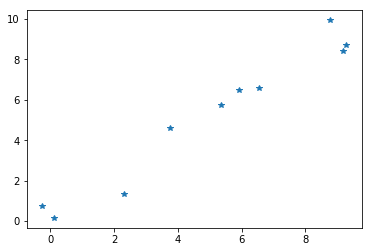

In [29]:
plt.plot(x_data, y_label, "*")

In [30]:
# y = mx + b

In [31]:
# Give two random values to m and b.
np.random.rand(2)

array([0.40995854, 0.6415701 ])

In [32]:
m = tf.Variable(0.47)
b = tf.Variable(0.43)

In [33]:
error = 0

for x,y in zip(x_data, y_label):
    
    y_hat = m*x + b
    
    # Mean Square Error
    error += (y-y_hat)**2

In [34]:
# Declaring GradientDescentOptimizer.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# Train Model
train = optimizer.minimize(error)

In [35]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    
    sess.run(init)
    
    # Epochs
    
    training_steps = 1000
    
    for i in range(training_steps):
        sess.run(train)
        
    # Predicted Values
    
    final_slope, final_intercept = sess.run([m, b])

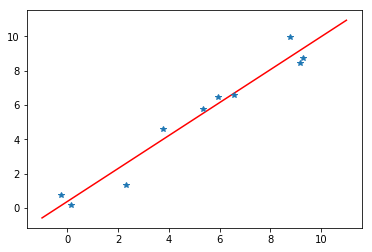

In [37]:
x_test = np.linspace(-1, 11, 10)

# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, "*")